## Bhekie Danisa (201633631)

In [198]:
import operator

import numpy as np
import pandas as pd
from scipy import linalg
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [187]:
n = 200
np.random.seed(123)
x = np.random.uniform(0, 300, n)
x = x[np.argsort(x)]
y = 5 + x**1 + x**2 + x**3
y_obs = y + np.random.normal(0, 900000, n)

In [188]:
X = x.reshape(-1, 1)
Y = y_obs.reshape(-1, 1)

#### Design matrix of a 6th-degree polynomial.

In [189]:
poly_features= PolynomialFeatures(degree=6)
px = poly_features.fit_transform(X)

In [253]:
model = Ridge()
model.fit(px, Y)
y_pred = model.predict(px)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.11716e-31): result may not be accurate.
  overwrite_a=True).T


In [254]:
MSE = np.sqrt(mean_squared_error(Y, y_pred))

#### L2 regularised least squares regression

In [192]:
λ = 10
I = np.eye(7)
I[0,0] = 0

In [193]:
θ = np.linalg.inv(px.T.dot(px) + λ*I).dot(px.T).dot(y_obs)

In [195]:
MSE = np.sqrt(mean_squared_error(Y, y_pred))

In [197]:
σ_squared = (1/n) * (((y_obs-px.dot(θ)).T).dot(y_obs-px.dot(θ)))

#### Training and Testing dataset

In [180]:
X_train = x[x < 200]
X_test = x[x >= 200] 
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [181]:
y_train = y_obs[x < 200]
y_test = y_obs[x >= 200]
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [182]:
n_train = len(X_train)
n_test = len(X_test)

#### Cross Validation

In [183]:
train_test_λ = [0, 0.5, 10, 20, 30, 80, 100, 200] 

MSE_train = np.zeros(len(train_test_λ))
MSE_test = np.zeros(len(train_test_λ))

pred = X.shape[1]
coef = np.zeros((len(train_test_λ), pred))

In [249]:
for index, i in enumerate(train_test_λ):    
    ridge_reg = Ridge(alpha = i)
    ridge_reg.fit(X_train, y_train)
    cv = RidgeCV(alphas = train_test_λ, scoring = 'neg_mean_squared_error', normalize = True)

    MSE_train[index] = mean_squared_error(y_train, ridge_reg.predict(X_train))    
    MSE_test[index] = mean_squared_error(y_test, ridge_reg.predict(X_test))

In [250]:
df_λ = pd.DataFrame(MSE_test*100, columns=['MSE'])
df_λ['lambda'] = (train_test_λ)
df_λ.loc[df_λ['MSE'].idxmax()]

MSE       7.693232e+15
lambda    2.000000e+02
Name: 7, dtype: float64

In [251]:
best_model = Ridge(alpha = 0.05)
best_model.fit(X_train, y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

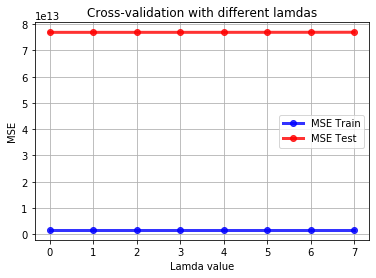

In [252]:
plt.plot(MSE_train, 'bo-', label='MSE Train', color="blue", alpha=0.8, linewidth=3)
plt.plot( MSE_test, 'bo-', label='MSE Test ', color="red", alpha=0.8, linewidth=3)
plt.xlabel('Lamda value'); plt.ylabel('MSE')
plt.title('Cross-validation with different lamdas')
plt.legend(loc='best')
plt.grid()